In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, uniform

np.random.seed(42)

***Задача 4***

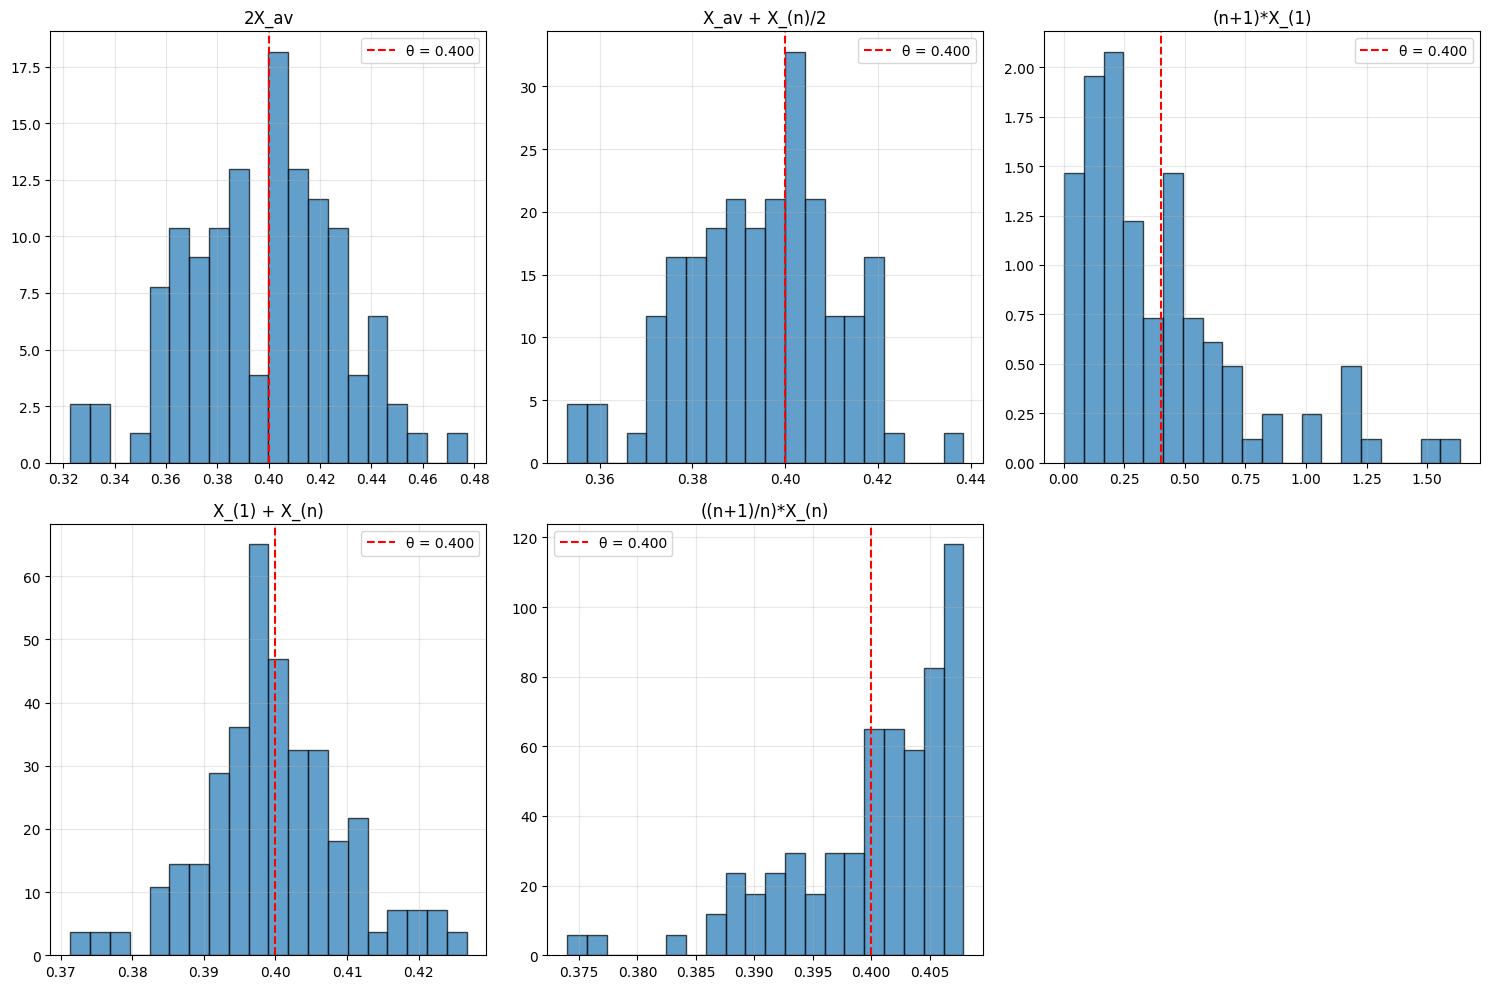

Описательные статистики для различных оценок:
Статистика           Mean       Std        Median     Min        Max       
--------------------------------------------------------------------------------
2X_av                0.3975     0.0299     0.4005     0.3228     0.4770    
X_av + X_(n)/2       0.3948     0.0163     0.3963     0.3530     0.4385    
(n+1)*X_(1)          0.3883     0.3457     0.2676     0.0002     1.6368    
X_(1) + X_(n)        0.3998     0.0097     0.3994     0.3713     0.4267    
((n+1)/n)*X_(n)      0.4000     0.0070     0.4020     0.3740     0.4079    


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

n = 50
N = 100
# Глеб (4 буквы), Милославов (10 букв)
theta = 4 / 10

np.random.seed(42)
samples = np.random.uniform(0, theta, size=(N, n))

statistics_names = [
    '2X_av',
    'X_av + X_(n)/2', 
    '(n+1)*X_(1)',
    'X_(1) + X_(n)',
    '((n+1)/n)*X_(n)'
]

stats_values = []

for sample in samples:
    sorted_sample = np.sort(sample)
    X_1 = sorted_sample[0]    
    X_n = sorted_sample[-1]   
    X_av = np.mean(sample)    
    
    stats_sample = [
        2 * X_av,                   
        X_av + X_n / 2,             
        (n + 1) * X_1,              
        X_1 + X_n,                  
        ((n + 1) / n) * X_n         
    ]
    stats_values.append(stats_sample)

stats_values = np.array(stats_values)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, values) in enumerate(zip(statistics_names, stats_values.T)):
    axes[i].hist(values, bins=20, alpha=0.7, edgecolor='black', density=True)
    axes[i].set_title(name)
    axes[i].axvline(theta, color='red', linestyle='--', label=f'θ = {theta:.3f}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

if len(statistics_names) < 6:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

print("Описательные статистики для различных оценок:")
print("=" * 80)
print(f"{'Статистика':<20} {'Mean':<10} {'Std':<10} {'Median':<10} {'Min':<10} {'Max':<10}")
print("-" * 80)

descriptive_stats = []
for i, name in enumerate(statistics_names):
    data = stats_values[:, i]
    stats_row = {
        'Statistic': name,
        'Mean': np.mean(data),
        'Std': np.std(data),
        'Median': np.median(data),
        'Min': np.min(data),
        'Max': np.max(data)
    }
    descriptive_stats.append(stats_row)
    print(f"{name:<20} {np.mean(data):<10.4f} {np.std(data):<10.4f} "
          f"{np.median(data):<10.4f} {np.min(data):<10.4f} {np.max(data):<10.4f}")



***Задача 5***

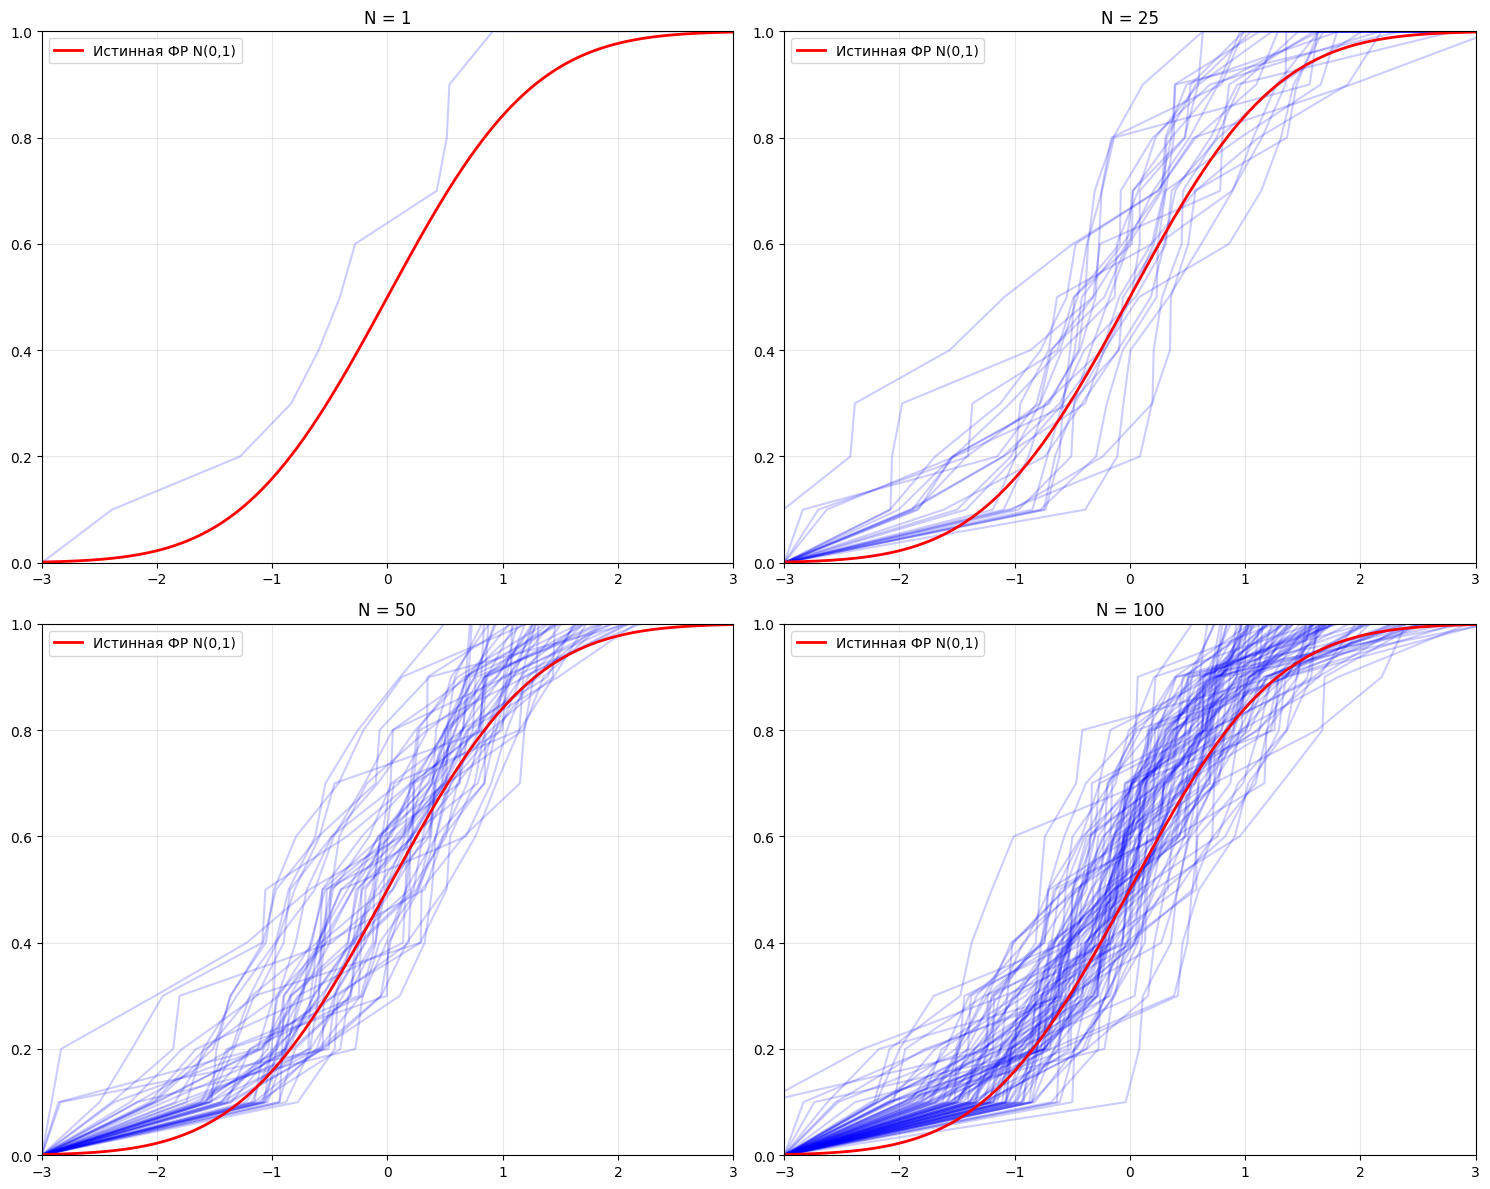

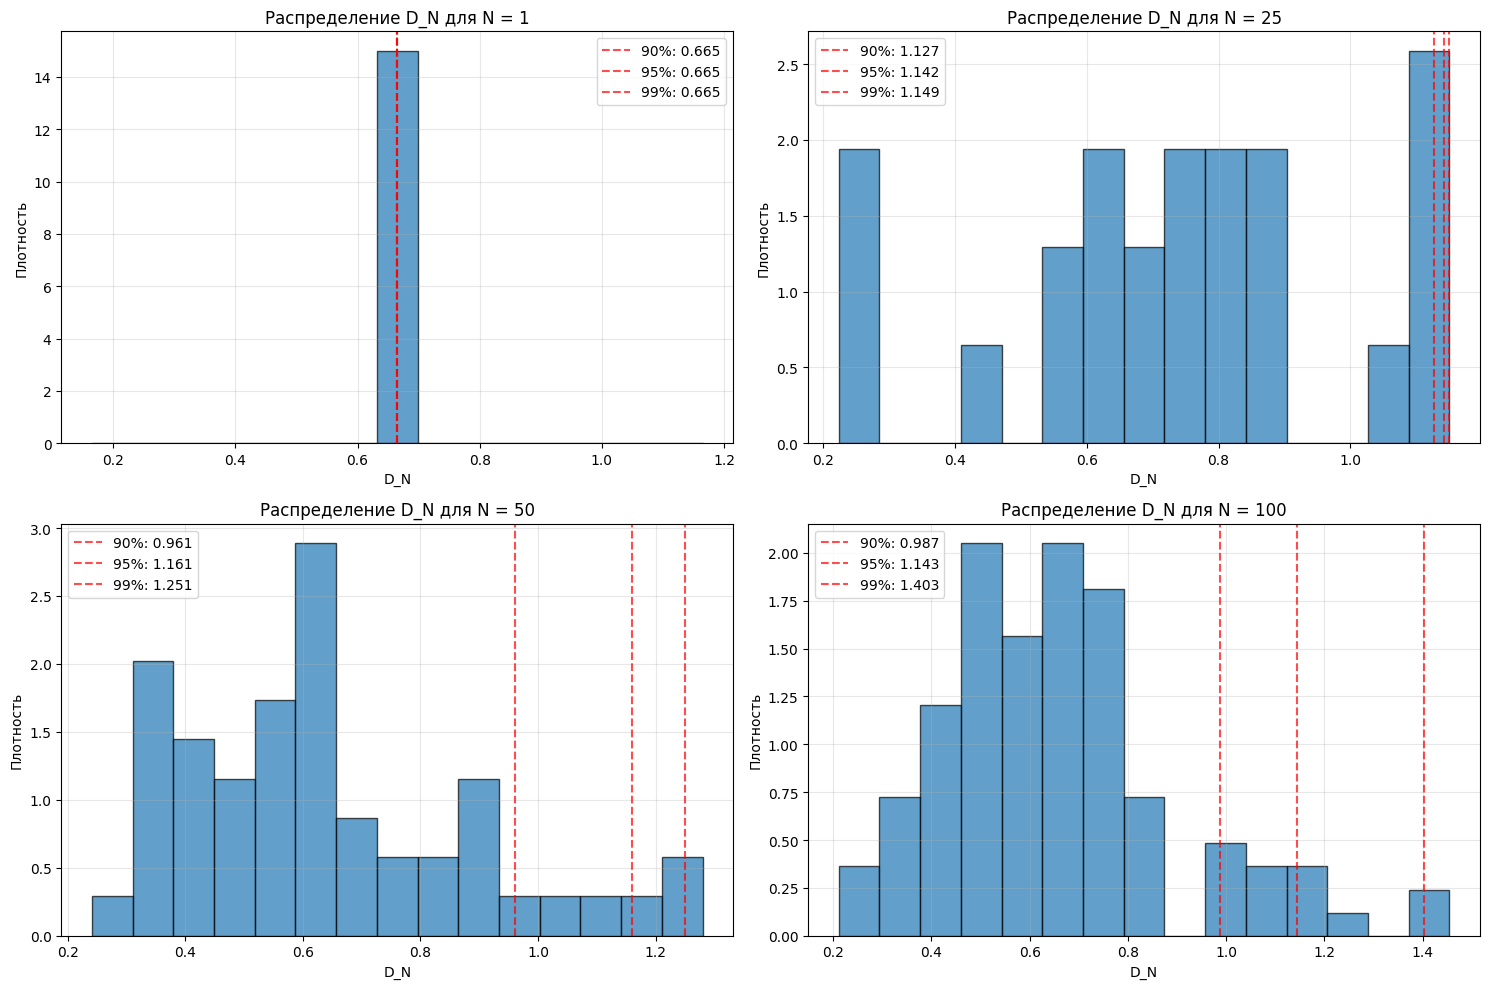


Квантили статистики D_N:
N = 1:
  90% квантиль: 0.6649
  95% квантиль: 0.6649
  99% квантиль: 0.6649

N = 25:
  90% квантиль: 1.1271
  95% квантиль: 1.1424
  99% квантиль: 1.1492

N = 50:
  90% квантиль: 0.9613
  95% квантиль: 1.1605
  99% квантиль: 1.2508

N = 100:
  90% квантиль: 0.9871
  95% квантиль: 1.1433
  99% квантиль: 1.4026



In [13]:
n = 10
sample_sizes = [1, 25, 50, 100]
N_values = sample_sizes

normal_samples = {}
for N in N_values:
    normal_samples[N] = norm.rvs(size=(N, n))

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

x_range = np.linspace(-3, 3, 1000)
true_cdf = norm.cdf(x_range)

for i, N in enumerate(N_values):
    ax = axes[i]
    
    for j in range(min(N, 100)):  
        sample = normal_samples[N][j]
        sample_sorted = np.sort(sample)
        y_vals = np.arange(1, n + 1) / n
        
        x_vals = np.repeat(sample_sorted, 2)
        x_vals = np.concatenate(([-3], x_vals, [3]))
        y_vals = np.repeat(y_vals, 2)
        y_vals = np.concatenate(([0], y_vals, [1]))
        
        ax.plot(x_vals, y_vals, alpha=0.2, color='blue')
    
    ax.plot(x_range, true_cdf, 'r-', linewidth=2, label='Истинная ФР N(0,1)')
    
    ax.set_title(f'N = {N}')
    ax.set_xlim(-3, 3)
    ax.set_ylim(0, 1)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

D_N_values = {}

for N in N_values:
    D_N_samples = []
    for j in range(N):
        sample = normal_samples[N][j]
        sample_sorted = np.sort(sample)
        emp_cdf = np.arange(1, n + 1) / n
        
        diff1 = np.abs(emp_cdf - norm.cdf(sample_sorted))
        diff2 = np.abs(np.concatenate(([0], emp_cdf)) - norm.cdf(np.concatenate(([-10], sample_sorted))))
        D = np.max(np.concatenate((diff1, diff2)))
        
        D_N_samples.append(np.sqrt(n) * D)
    
    D_N_values[N] = np.array(D_N_samples)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, N in enumerate(N_values):
    ax = axes[i]
    data = D_N_values[N]
    
    ax.hist(data, bins=15, alpha=0.7, edgecolor='black', density=True)
    ax.set_title(f'Распределение D_N для N = {N}')
    ax.set_xlabel('D_N')
    ax.set_ylabel('Плотность')
    
    quantiles = np.quantile(data, [0.9, 0.95, 0.99])
    for q, val in zip([0.9, 0.95, 0.99], quantiles):
        ax.axvline(val, color='red', linestyle='--', alpha=0.7, 
                  label=f'{int(q*100)}%: {val:.3f}')
    
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nКвантили статистики D_N:")
print("=" * 50)
for N in N_values:
    data = D_N_values[N]
    quantiles = np.quantile(data, [0.9, 0.95, 0.99])
    print(f"N = {N}:")
    print(f"  90% квантиль: {quantiles[0]:.4f}")
    print(f"  95% квантиль: {quantiles[1]:.4f}") 
    print(f"  99% квантиль: {quantiles[2]:.4f}")
    print()

Визуально видно, что при увеличении размера выборы $N$, всё более "тёмной" становится зона рядом с истинной функцией распределения, что подкрепляет теоритическую сходимость при очень больших $N$